In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("combined-csv-files.csv")
df

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 106,city.1
0,38585,https://www.airbnb.com/rooms/38585,2.02003E+13,3/21/2020,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,...,moderate,t,t,1,0,1,0,1.21,NaN,Asheville
1,80905,https://www.airbnb.com/rooms/80905,2.02003E+13,3/21/2020,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",...,super_strict_60,f,f,11,11,0,0,1.03,NaN,Asheville
2,108061,https://www.airbnb.com/rooms/108061,2.02003E+13,3/21/2020,"Walk downtown or UNCA, Pets OK!",Walk to town in ten minutes! Monthly rental in...,True Asheville...artist styled apartment with ...,Walk to town in ten minutes! Monthly rental in...,none,"I love my neighborhood! Its friendly, easy-goi...",...,strict_14_with_grace_period,f,f,2,2,0,0,0.86,NaN,Asheville
3,155305,https://www.airbnb.com/rooms/155305,2.02003E+13,3/21/2020,Cottage! BonPaul + Sharky's Hostel,NaN,Private cottage located behind the main house ...,Private cottage located behind the main house ...,none,"We are within easy walk of pubs, breweries, mu...",...,moderate,f,f,7,1,2,4,2.28,NaN,Asheville
4,156805,https://www.airbnb.com/rooms/156805,2.02003E+13,3/21/2020,"Private Room ""Ader"" at BPS Hostel",NaN,Private Rooms at Bon Paul and Sharky's Hostel....,Private Rooms at Bon Paul and Sharky's Hostel....,none,"Easy walk to pubs, cafes, bakery, breweries, l...",...,moderate,f,f,7,1,2,4,0.65,NaN,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305585,42938773,https://www.airbnb.com/rooms/42938773,2.02003e+13,3/18/2020,"Lux Dupont Circle 1BR nr. U Street, Metro & Gl...",Feel at home wherever you choose to live with ...,"Thoughtfully designed with bespoke finishes, m...",Feel at home wherever you choose to live with ...,none,This apartment for rent in Dupont Circle invit...,...,flexible,f,f,177,177,0,0,NaN,NaN,"Washington, D.C."
305586,42938788,https://www.airbnb.com/rooms/42938788,2.02003e+13,3/19/2020,"Airy Mount Vernon 1BR w/ Gym, Pool, Rooftop, n...","Discover the best of Washington, with this one...","Gorgeous furniture, fully-equipped kitchen, sm...","Discover the best of Washington, with this one...",none,This furnished Blueground apartment is located...,...,flexible,f,f,177,177,0,0,NaN,NaN,"Washington, D.C."
305587,42941255,https://www.airbnb.com/rooms/42941255,2.02003e+13,3/18/2020,Sojourn the 13th Street Flats,"Sojourn, A Turnkey Luxury Experience. We’ve h...",All Sojourn homes come with: - 24/7 support vi...,"Sojourn, A Turnkey Luxury Experience. We’ve h...",none,U Street has a reputation as the hip and urban...,...,moderate,f,f,58,44,10,0,NaN,NaN,"Washington, D.C."
305588,42947167,https://www.airbnb.com/rooms/42947167,2.02003e+13,3/18/2020,NEW! Charming DC Escape ~1 Mi to the Navy Yard!,Escape to this conveniently located vacation r...,Free Parking | Additional Accommodations | Wal...,Escape to this conveniently located vacation r...,none,MONUMENTS & HISTORIC SITES: Frederick Douglass...,...,strict_14_with_grace_period,f,f,19,19,0,0,NaN,NaN,"Washington, D.C."


In [3]:
# Create dataframe listings with relevant columns
listings = df[['id','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since',
    'guests_included','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy']]

# Convert price column to float
listings.price = listings.price.astype(float)

ValueError: could not convert string to float: '$50.00 '

In [26]:
# Convert host_since from string to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


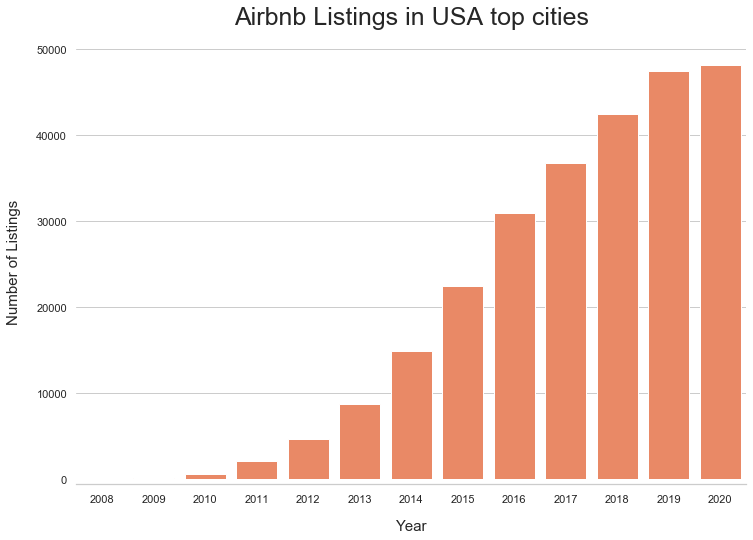

In [27]:
# Create a series to group listings by year and convert to a dataframe
result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

# Rename column id to listings and reset index
year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

# Create a new column with the cumulative listings by year
year['total listings']= year['listings'].cumsum(axis=0)

# Convert host_since data type to int
year['host_since'] = year['host_since'].astype(int)

# Rename column host_since to year
year.rename(columns={'host_since':'year'}, inplace=True)

# Plot Airbnb listings over time
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="total listings", data=year, color='Coral')
ax.set_title('Airbnb Listings in USA top cities',fontsize=25,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Number of Listings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

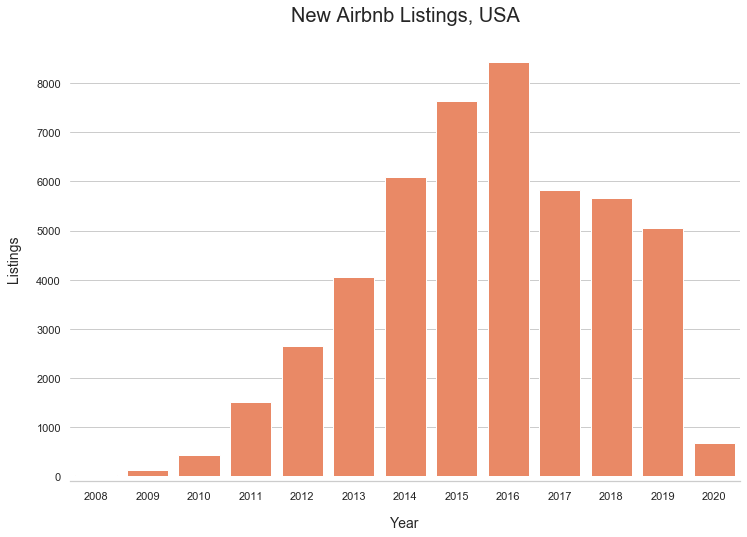

In [28]:
# Plot new Airbnb listings over time
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x='year', y="listings", data=year, color="coral")
ax.set_title('New Airbnb Listings, USA',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=14, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Listings',fontsize=14, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

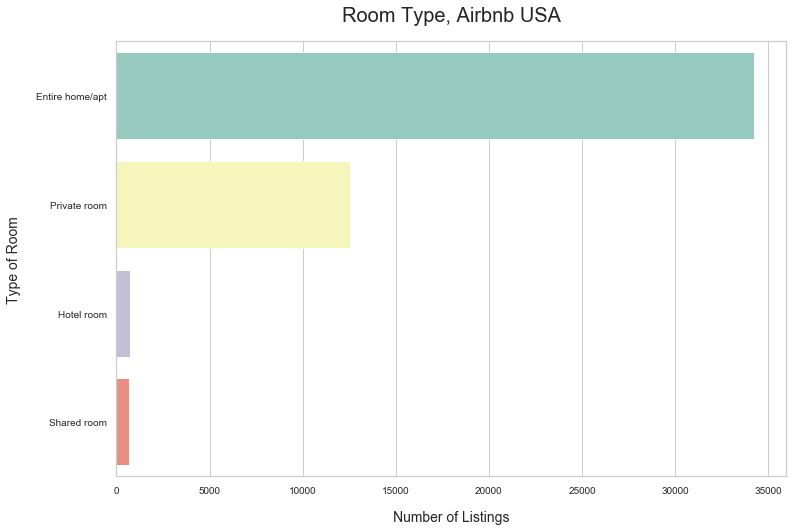

In [29]:
# Plot the room types in USA
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.axes.set_title("Room Type, Airbnb USA",fontsize=20, pad=20)
ax = sns.countplot(y='room_type',data=listings,order=listings['room_type'].value_counts().index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

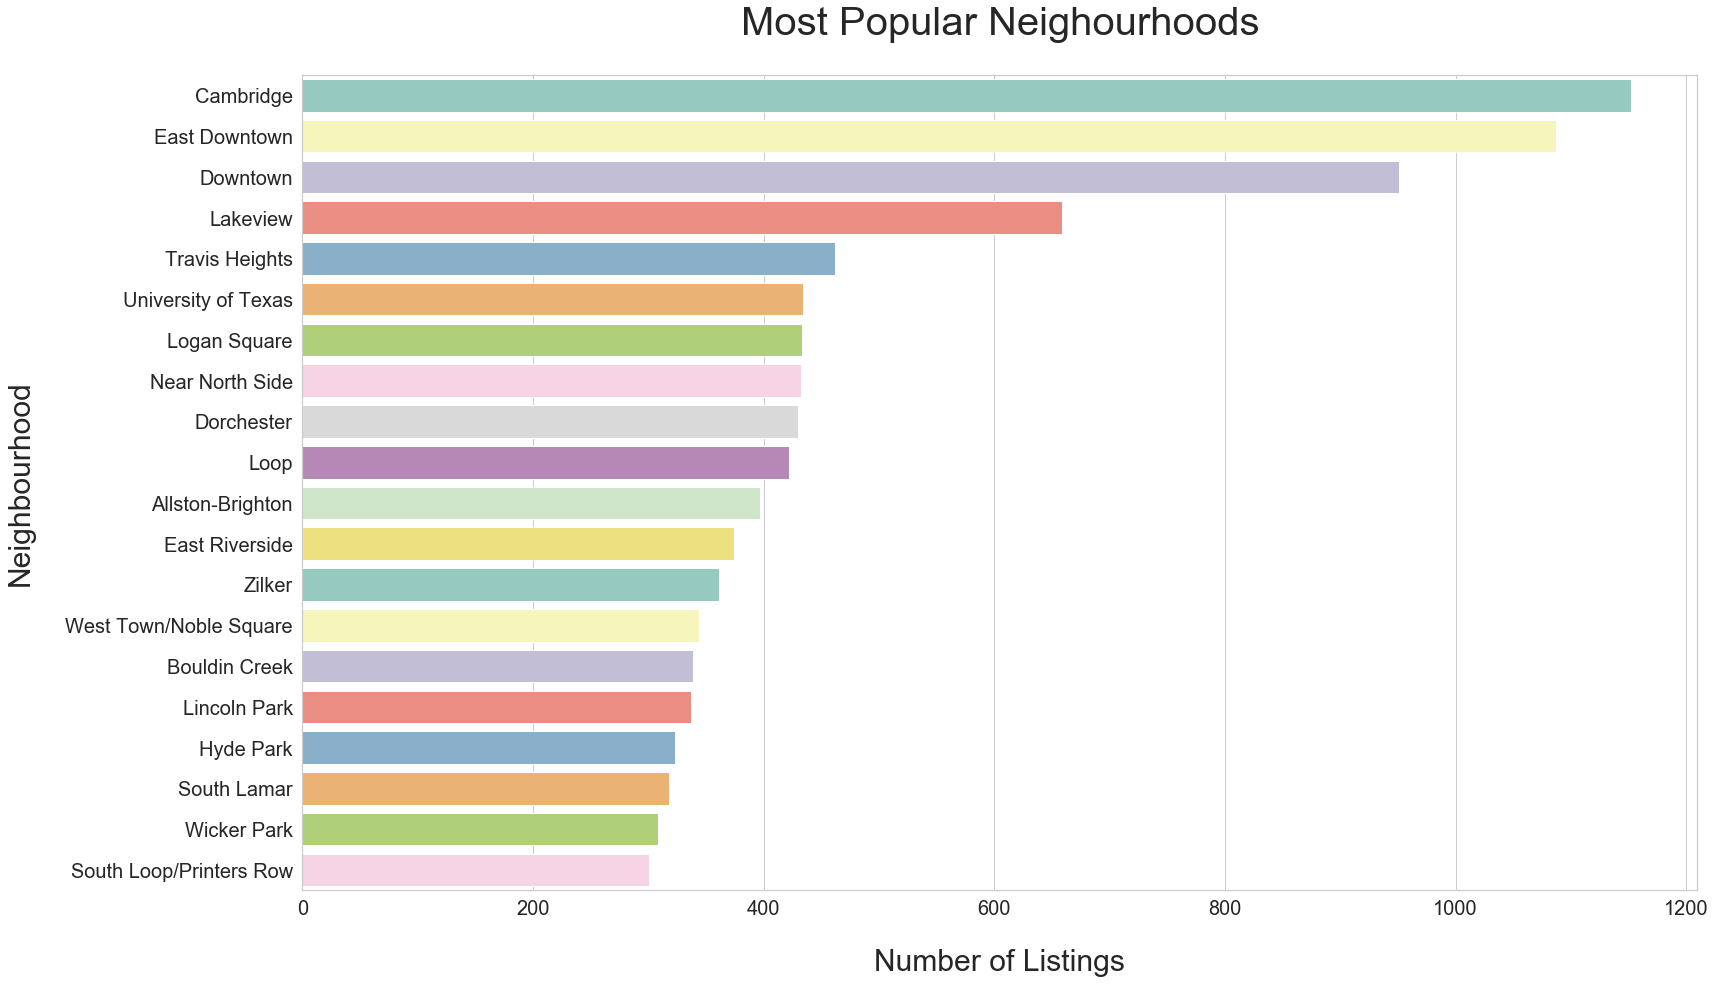

In [30]:
# Plot top 20 neighbourhoods in terms listings
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

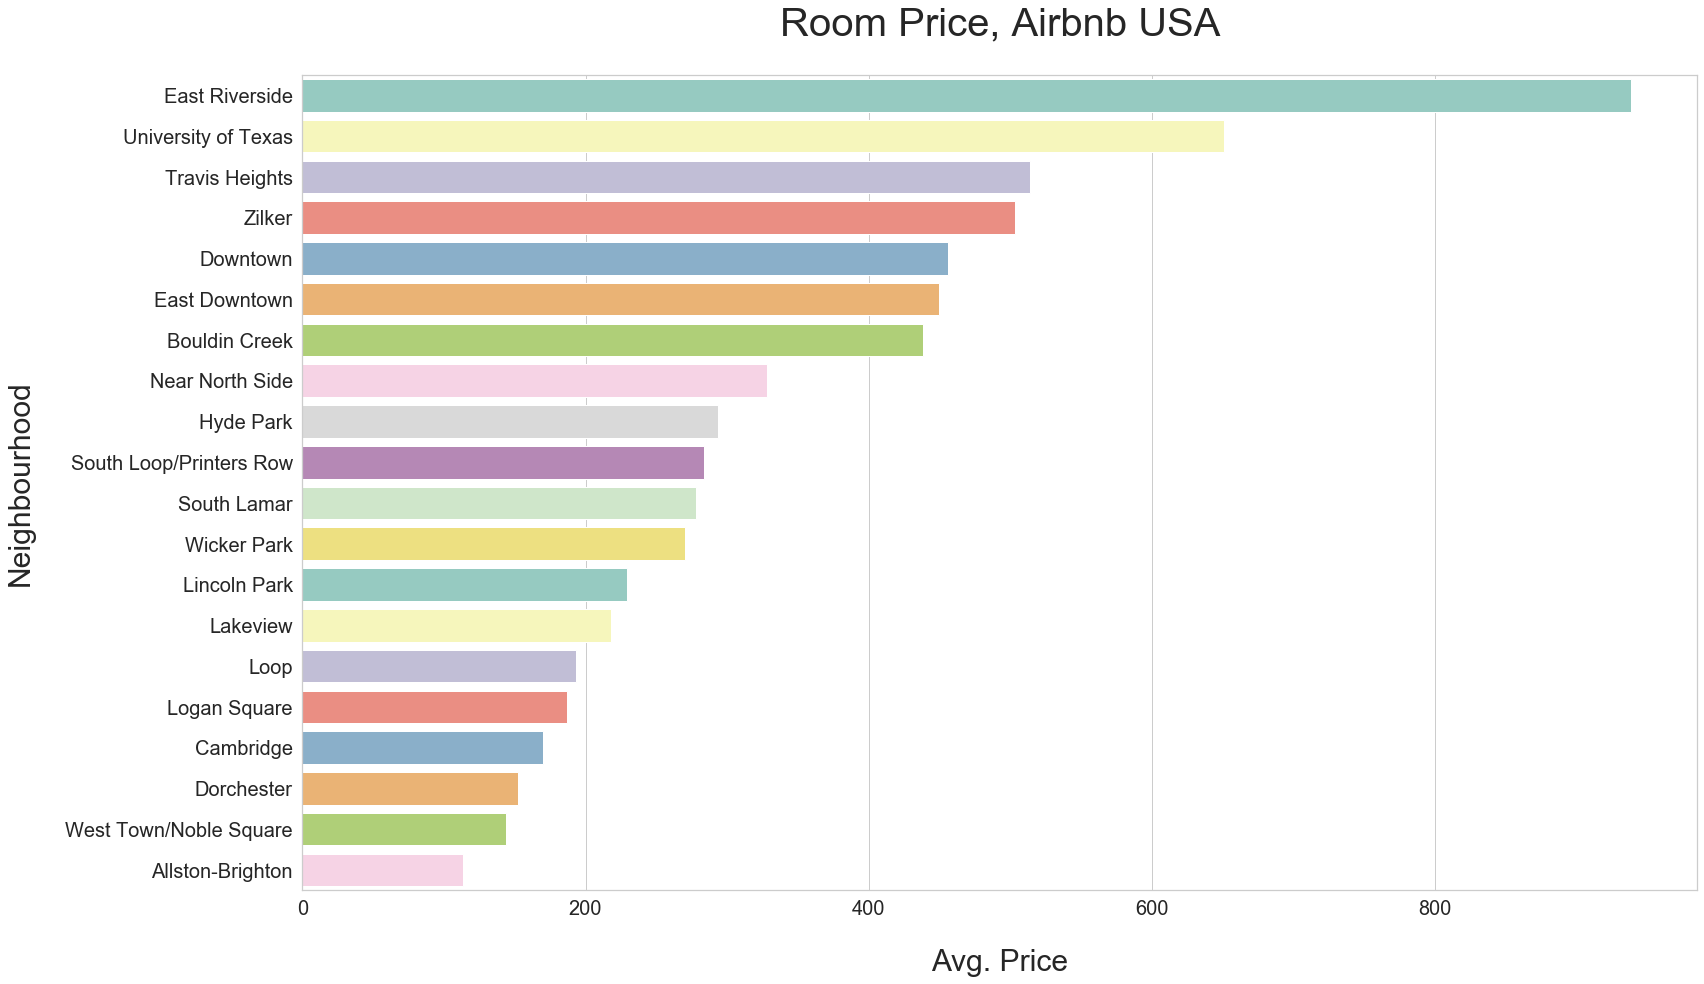

In [32]:
# Create a list of top 20 neighbourhoords in terms of listings
top = listings['neighbourhood'].value_counts().iloc[:20].index.tolist()

# Create a dataframe to group neighbourhoods by average room price
price = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean().reset_index())

# Create a dataframe to filter top 20 neighbourhoods
top_price = price[price['neighbourhood'].isin(top)].sort_values('price',ascending=False)

# Barplot of price by neighbourhood, top 20 neighbourhoods in terms of listings
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Room Price, Airbnb USA",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set3')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

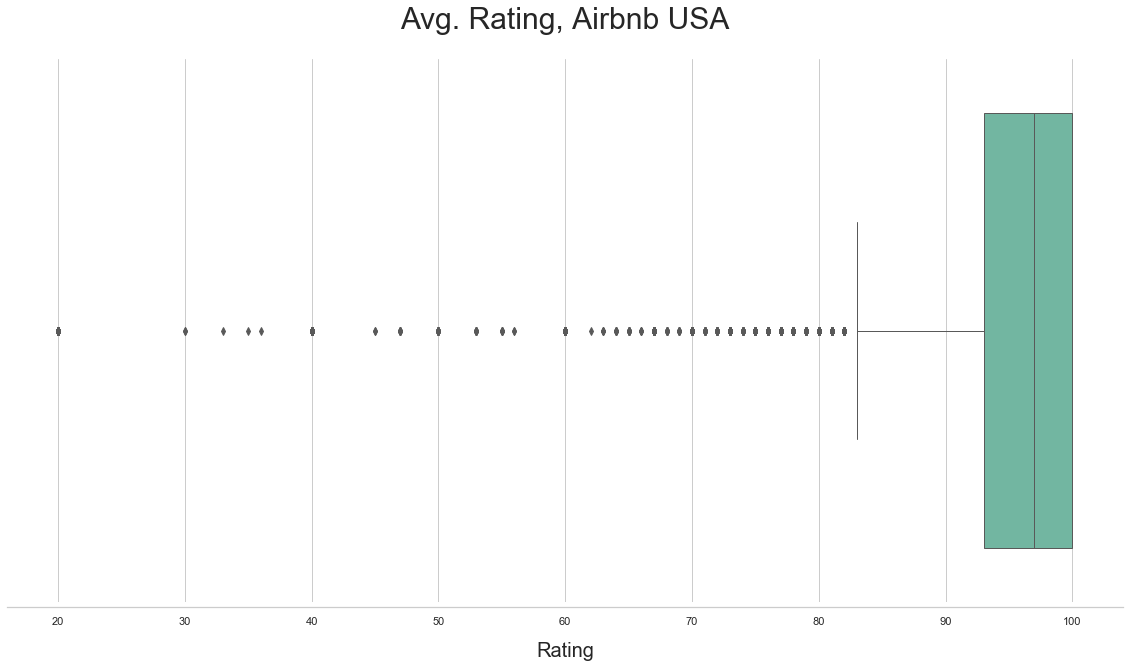

In [33]:
# Boxplot of the ratings for the listings
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(x=listings["review_scores_rating"], linewidth=1, palette='Set2')
ax.set_title('Avg. Rating, Airbnb USA',fontsize=30,pad=30) # Give the plot a main title
ax.set_xlabel('Rating',fontsize=20, labelpad=15) # Set text for the x axis,

sns.despine(offset=5, left=True)

In [35]:
# Create new dataframe for listings grouped by neighbourhood
listings_geo = pd.DataFrame(listings.groupby(['neighbourhood_cleansed']).id.count()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
listings_geo.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

# Create new dataframe for listings grouped by neighbourhood
price_geo = pd.DataFrame(listings.groupby(['neighbourhood_cleansed']).price.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
price_geo.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

# Create a new dataframe for ratings grouped by neighbourhood
ratings_geo = pd.DataFrame(listings.groupby(['neighbourhood_cleansed']).review_scores_rating.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
ratings_geo.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

# Drop the column neighbourhood_group, no useful data
usa_geo.drop(columns=['neighbourhood_group'],inplace=True)

# Merge listings, price and ratings with geo
usa_geo = usa_geo.merge(listings_geo, on='neighbourhood')
usa_geo = usa_geo.merge(price_geo, on='neighbourhood')
usa_geo = usa_geo.merge(ratings_geo, on='neighbourhood')

# Inspect the dataframe
usa_geo.head()

NameError: name 'usa_geo' is not defined